In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = '../data/df_repos_metadata.json'
with open(file_path, 'r') as file:
    loaded_data = json.load(file)

In [3]:
df = pd.DataFrame(data=loaded_data)

In [4]:
df.head(3)

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score,language_spoken
0,619825247,LMFlow,OptimalScale/LMFlow,https://github.com/OptimalScale/LMFlow,An Extensible Toolkit for Finetuning and Infer...,https://api.github.com/repos/OptimalScale/LMFlow,https://api.github.com/repos/OptimalScale/LMFl...,2023-03-27T13:56:29Z,2025-04-14T14:33:55Z,2025-04-13T05:44:14Z,...,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[chatgpt, deep-learning, instruction-following...",public,834,83,8400,main,1.0,en
1,85012942,gixy,yandex/gixy,https://github.com/yandex/gixy,Nginx configuration static analyzer,https://api.github.com/repos/yandex/gixy,https://api.github.com/repos/yandex/gixy/label...,2017-03-15T01:02:40Z,2025-04-14T03:39:18Z,2024-07-28T20:09:31Z,...,"{'key': 'other', 'name': 'Other', 'spdx_id': '...",True,[],public,418,56,8430,master,1.0,it
2,272811260,PathPlanning,zhm-real/PathPlanning,https://github.com/zhm-real/PathPlanning,Common used path planning algorithms with anim...,https://api.github.com/repos/zhm-real/PathPlan...,https://api.github.com/repos/zhm-real/PathPlan...,2020-06-16T21:00:44Z,2025-04-14T09:47:50Z,2023-02-06T07:54:46Z,...,"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",True,"[anytime-dstar, anytime-repairing-astar, astar...",public,1704,30,8484,master,1.0,en


In [5]:
len(df)

821

### analyse numeric values

In [6]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,8.210000e+02,8.210000e+02,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.0
mean,2.879688e+08,1.372650e+05,18965.451888,18965.451888,3056.566382,329.790499,3056.566382,329.790499,18965.451888,1.0
std,2.797556e+08,5.572373e+05,26148.308832,26148.308832,5218.564053,886.342103,5218.564053,886.342103,26148.308832,0.0
min,2.655400e+04,7.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0
25%,4.993581e+07,3.649000e+03,5719.000000,5719.000000,615.000000,37.000000,615.000000,37.000000,5719.000000,1.0
50%,1.687995e+08,1.782100e+04,11868.000000,11868.000000,1507.000000,116.000000,1507.000000,116.000000,11868.000000,1.0
75%,5.750483e+08,7.172500e+04,24091.000000,24091.000000,3333.000000,298.000000,3333.000000,298.000000,24091.000000,1.0
max,9.548733e+08,1.087097e+07,335520.000000,335520.000000,49242.000000,16073.000000,49242.000000,16073.000000,335520.000000,1.0


In [7]:
len(df[df['stargazers_count'] > 15372])

324

In [8]:
# estimation for number of bins
stars = df['stargazers_count'].unique().tolist()
num_of_stars = len(stars)
num_of_stars

820

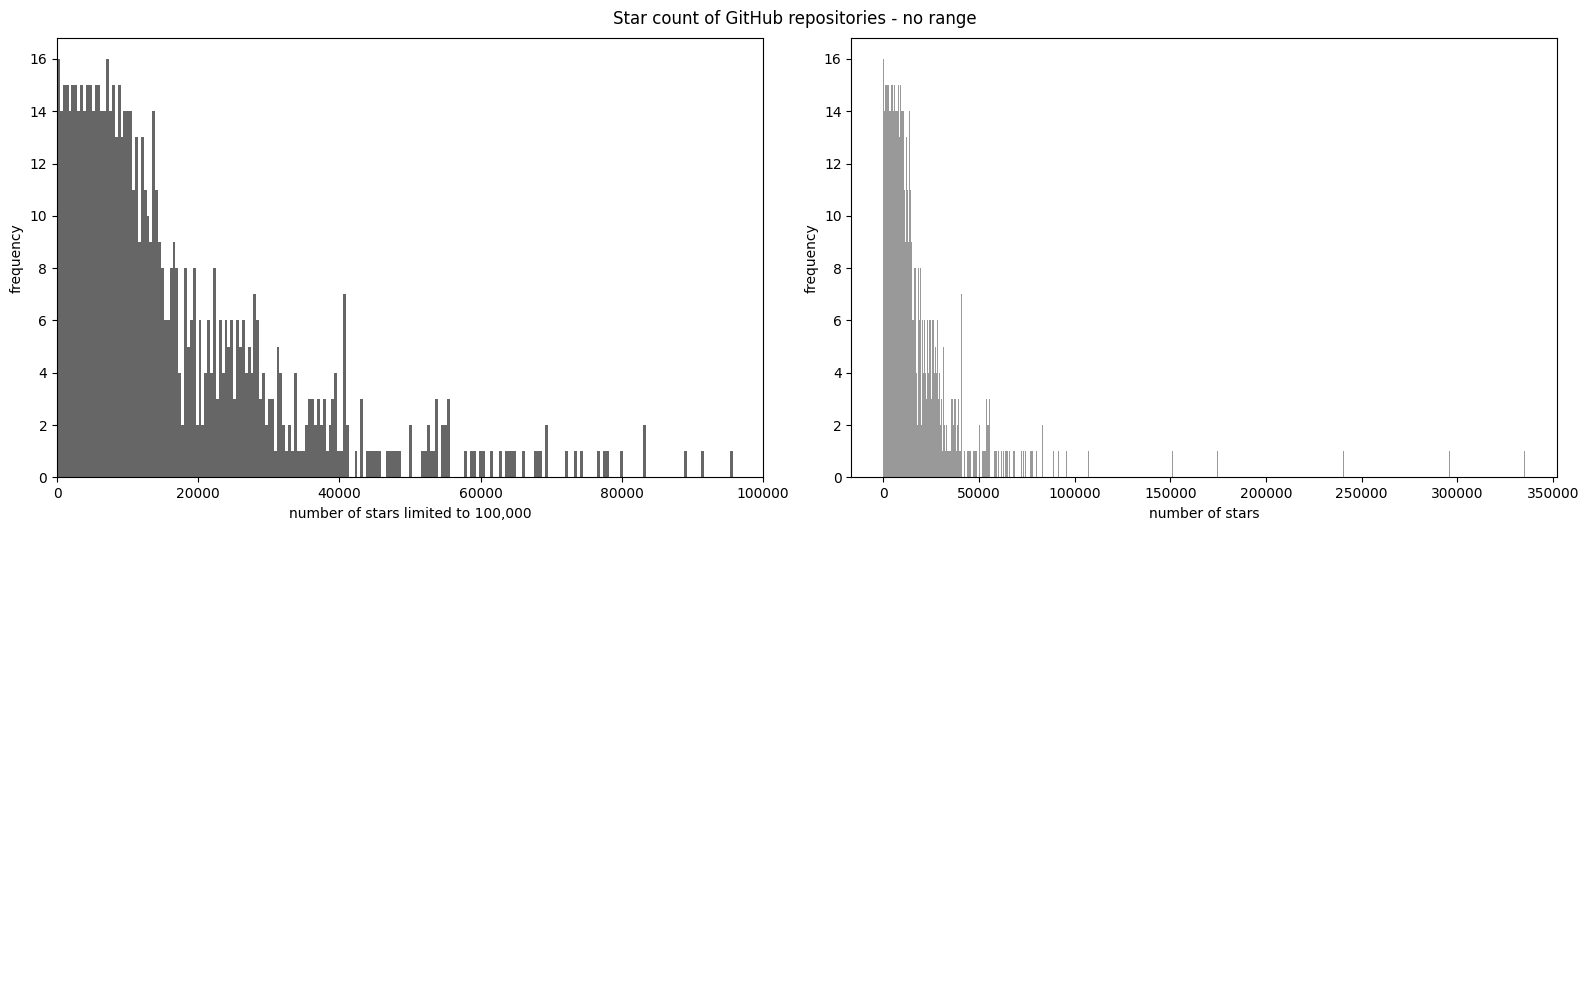

In [9]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=num_of_stars)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=num_of_stars)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories - no range')
# format of interval between plots
plt.tight_layout()

plt.show()

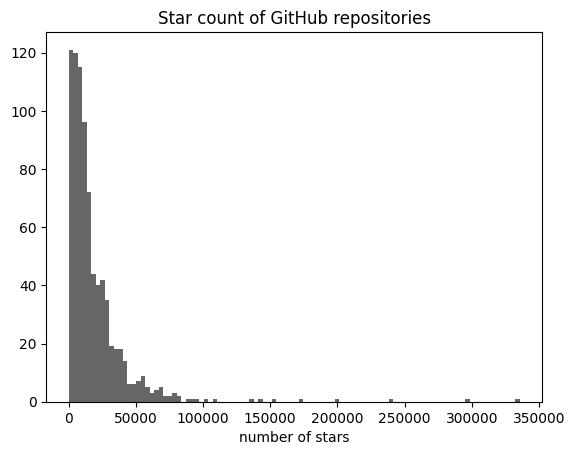

In [12]:
plt.hist(df['stargazers_count'], color='0.4', bins=100)
plt.xlabel('number of stars')
plt.title('Star count of GitHub repositories')

plt.show()

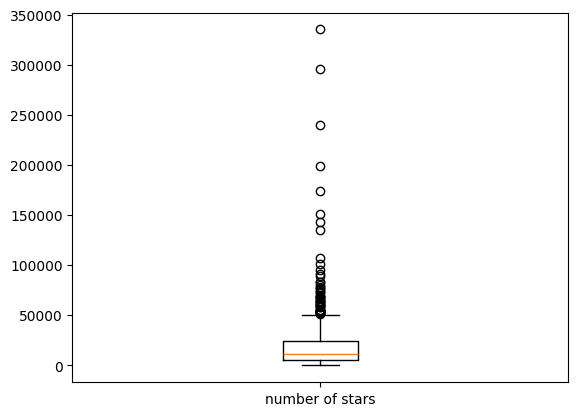

In [11]:
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()